# Setup

In [ ]:
from langchain_openai import OpenAI
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
import yaml
import os

In [ ]:
with open('config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)
os.environ['OPENAI_API_KEY'] = config['OPENAI_API_KEY']

In [ ]:
openai = OpenAI(model_name='gpt-3.5-turbo-instruct', temperature=0)

# RouterChain

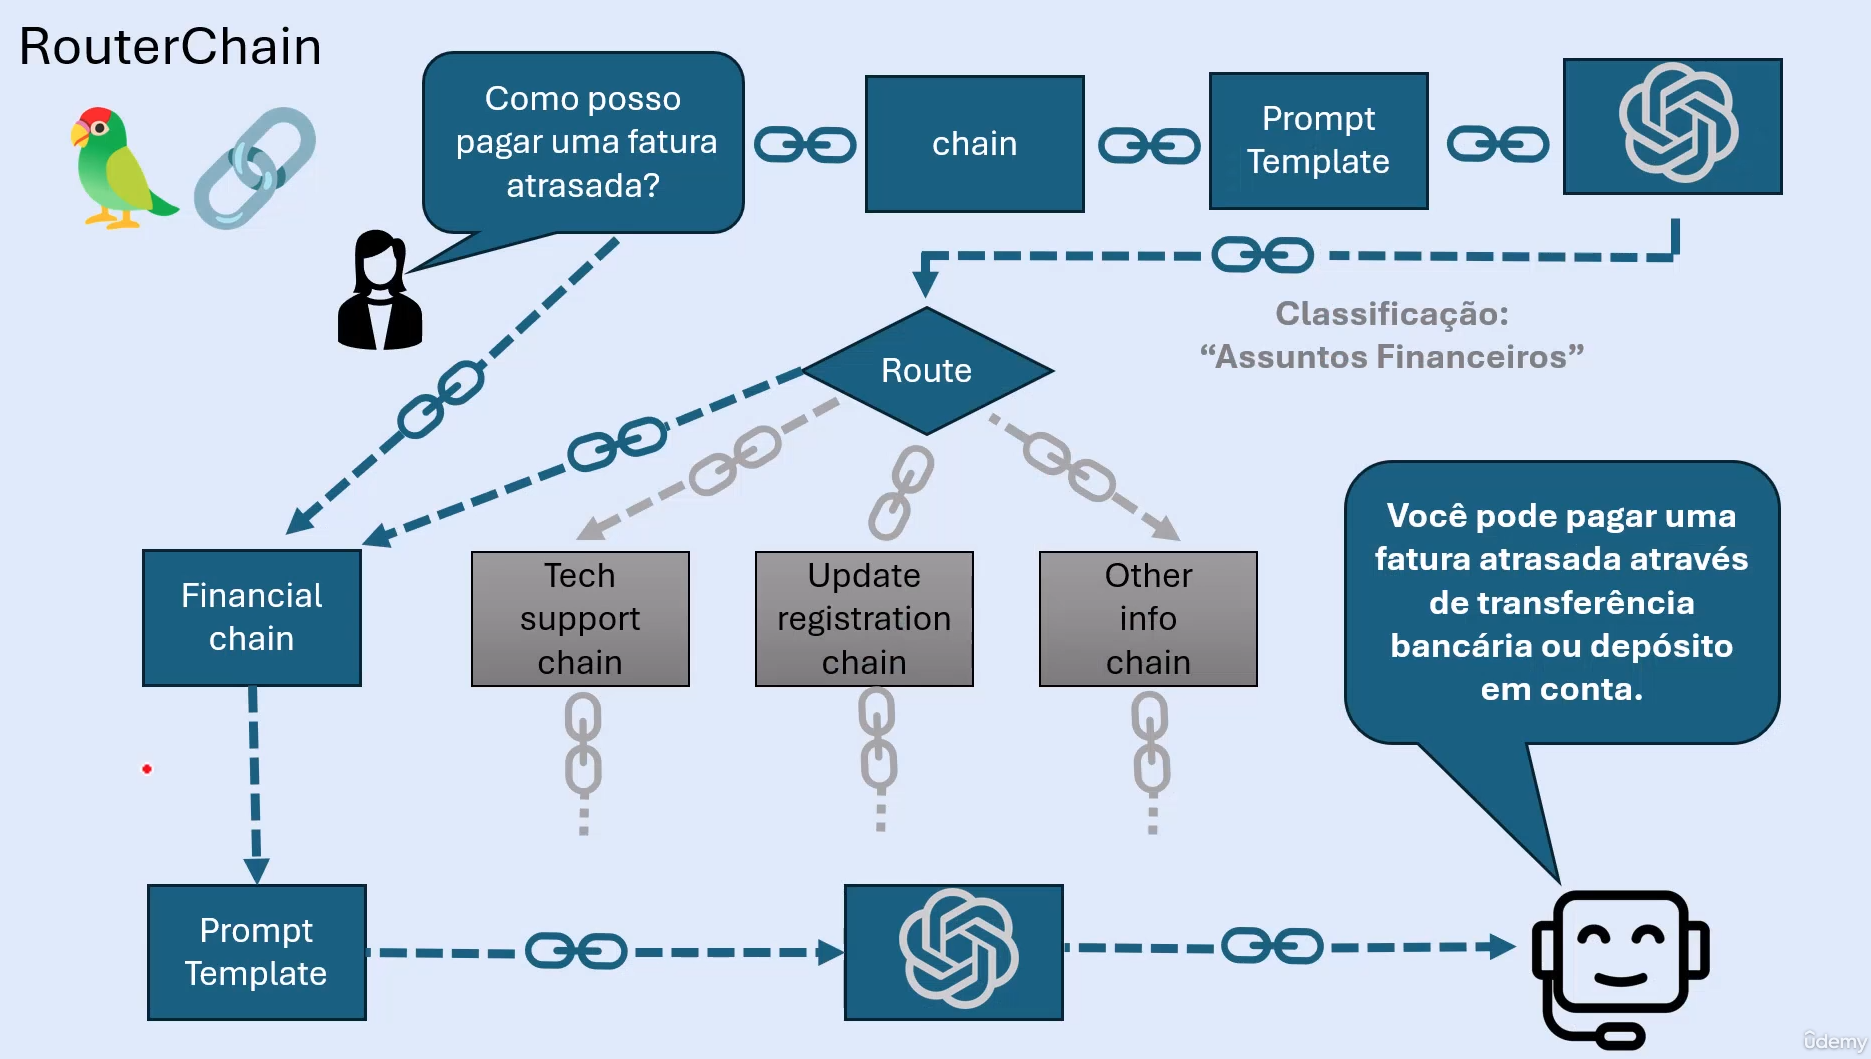

In [ ]:
# ela inicial (classificação)
chain = (
    PromptTemplate.from_template(
        """
        Classifique a pergunta do usuário em uma das seguintes categorias:
        - Assuntos Financeiros
        - Suporte Técnico
        - Atualização de Cadastro
        - Outras Informações

        Pergunta: {query}
        Classificação:
        """
    )
    | openai
    | StrOutputParser() 
)

In [ ]:
print(chain)

In [ ]:
# elos específicos
financial_chain = PromptTemplate.from_template(
    """
    Você é um especialista financeiro.
    Sempre responda às perguntas começando com "Bem-vindo ao Suporte Financeiro".
    Responda à pergunta do usuário:
    Pergunta: {query}
    Resposta:
    """
) | openai
tech_support_chain = PromptTemplate.from_template(
    """
    Você é um especialista em suporte técnico.
    Sempre responda às perguntas começando com "Bem-vindo ao Suporte Técnico".
    Ajude o usuário com seu problema técnico.
    Pergunta: {query}
    Resposta:
    """
) | openai
update_registration_chain = PromptTemplate.from_template(
    """
    Você é um representante de atendimento ao cliente.
    Sempre responda às perguntas começando com "Bem-vindo ao Suporte de Cadastro".
    Guie o usuário na atualização de suas informações de cadastro.
    Pergunta: {query}
    Resposta:
    """
) | openai
other_info_chain = PromptTemplate.from_template(
    """
    Você é um assistente de informações gerais.
    Sempre responda às perguntas começando com "Bem-vindo ao Suporte Geral".
    Forneça informações ao usuário sobre sua pergunta.
    Pergunta: {query}
    Resposta:
    """
) | openai

In [ ]:
# Função de roteamento
def route(info):
    topic = info["topic"].lower()
    if "financeiro" in topic:
        return financial_chain
    elif "técnico" in topic:
        return tech_support_chain
    elif "atualização" in topic or "cadastro" in topic:
        return update_registration_chain
    else:
        return other_info_chain

In [ ]:
# Exemplos 1 suporte técnico
classification = chain.invoke({"query": "Como faço para redefinir minha senha?"})
print(classification)

In [ ]:
#chama a função rote, passando o topico
response_chain = route({"topic": classification})
print(response_chain)

In [ ]:
#executa o objeto correto
response = response_chain.invoke({"query": "Como faço para redefinir minha senha?"})
print(response)

In [ ]:
# Exemplo 2 (Assuntos Financeiros)
classification = chain.invoke({"query": "Como posso pagar uma fatura atrasada?"})
response_chain = route({"topic": classification})
response = response_chain.invoke({"query": "Como posso pagar uma fatura atrasada?"})
print(response)

In [ ]:
# Exemplo 3 (Atualização de Cadastro)
classification = chain.invoke({"query": "Preciso alterar meu endereço de e-mail."})
response_chain = route({"topic": classification})
response = response_chain.invoke({"query": "Preciso alterar meu endereço de e-mail."})
print(response)

In [ ]:
# Exemplo 4 (Outras Informações)
classification = chain.invoke({"query": "Qual é a missão da empresa?"})
response_chain = route({"topic": classification})
response = response_chain.invoke({"query": "Qual é a missão da empresa?"})
print(response)